In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../src/')
import utils as ut
import avida as avida
import evals as evals

In [2]:
X=np.genfromtxt("../data/scGEM_methylation.csv", delimiter=",")
y=np.genfromtxt("../data/scGEM_expression.csv", delimiter=",")
print("Dimensions of input datasets are: ", "X= ", X.shape, " Y= ", y.shape)
(n1,d1)=X.shape
(n2,d2)=y.shape
our_normalize=1

Y1, Y2 = avida.avida_tsne(X,y,perplexity=60.0,alpha=0.9,normalize=our_normalize,visualize=0,graph_dist=True)

circular_frustrum_FOSCTTM_avida = np.mean(evals.calc_domainAveraged_FOSCTTM(Y1, Y2))
circular_frustrum_integration_avida = evals.integration_score(Y1,Y2)
circular_frustrum_vision_loss_avida = evals.vis_loss(X,y,Y1,Y2,our_normalize)
circular_frustrum_alignment_avida = evals.test_alignment_score(Y1,Y2)
circular_frustrum_accuracy_ours_avida = evals.our_accuracy(Y1, Y2)

print('AVIDA FOSCTTM score: '+str(circular_frustrum_FOSCTTM_avida))
print('AVIDA Integration score: '+str(circular_frustrum_integration_avida))
print('AVIDA t-SNE Loss: '+str(circular_frustrum_vision_loss_avida))
print('AVIDA Alignment Score: '+str(circular_frustrum_alignment_avida))
print('AVIDA Our Accuracy Score: '+str(circular_frustrum_accuracy_ours_avida))

Dimensions of input datasets are:  X=  (177, 27)  Y=  (177, 34)
Computing pairwise distances...
Computing P-values for point 0 of 177...
Mean value of sigma: 0.334819
Computing pairwise distances...
Computing P-values for point 0 of 177...
Mean value of sigma: 0.403536
Iteration 100: error is 16.153202
Iteration 200: error is 16.079459
Iteration 300: error is 0.447246
It.  |Err         
-------------------
    0|2.772535e-03|
   10|1.496872e-03|
   20|4.810892e-03|
   30|7.447084e-03|
   40|8.113744e-03|
   50|8.572576e-03|
   60|9.121640e-03|
   70|9.631537e-03|
   80|9.952333e-03|
   90|1.011491e-02|
  100|1.019138e-02|
  110|1.023623e-02|
  120|1.024759e-02|
  130|1.024486e-02|
  140|1.024927e-02|
  150|1.025123e-02|
  160|1.025219e-02|
  170|1.025269e-02|
  180|1.025296e-02|
  190|1.025311e-02|
0.032479436566749315
Iteration 400: error is 0.469235
It.  |Err         
-------------------
    0|3.504118e-03|
   10|1.882562e-03|
   20|2.344050e-03|
   30|1.129681e-03|
   40|3.432237e-0

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Colored based on cell')

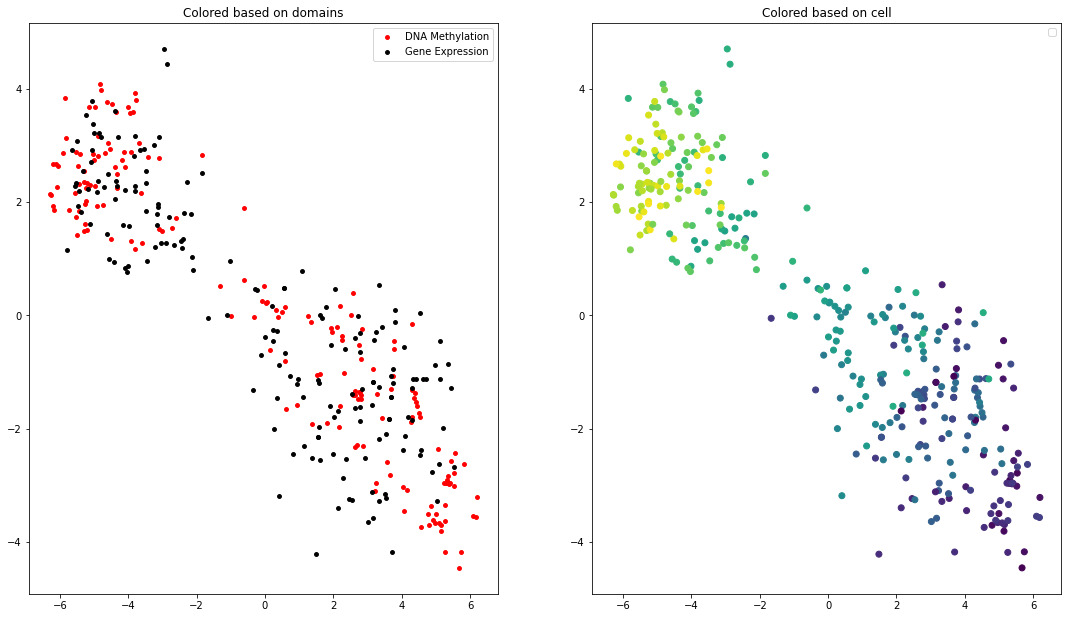

In [5]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(18.5, 10.5)

basic_labels1 = np.arange(start=0.0,stop=1.0,step=1./n1)
basic_labels2 = np.arange(start=0.0,stop=1.0,step=1./n2)

axs[0].scatter(Y2[:,0],Y2[:,1],c='r',s=15,label='DNA Methylation')
axs[0].scatter(Y1[:,0],Y1[:,1],c='k',s=15,label='Gene Expression')
axs[0].legend()
axs[0].set_title("Colored based on domains")

axs[1].scatter(Y2[:,0],Y2[:,1],c=basic_labels2)
axs[1].scatter(Y1[:,0],Y1[:,1],c=basic_labels1)
axs[1].legend()
axs[1].set_title("Colored based on cell")